In [40]:
plt.rcParams['figure.figsize'] = [30,10]
file = open("../results/setup0/1/logs/usage/server10/ps.log", 'r') 
lines = file.readlines() 

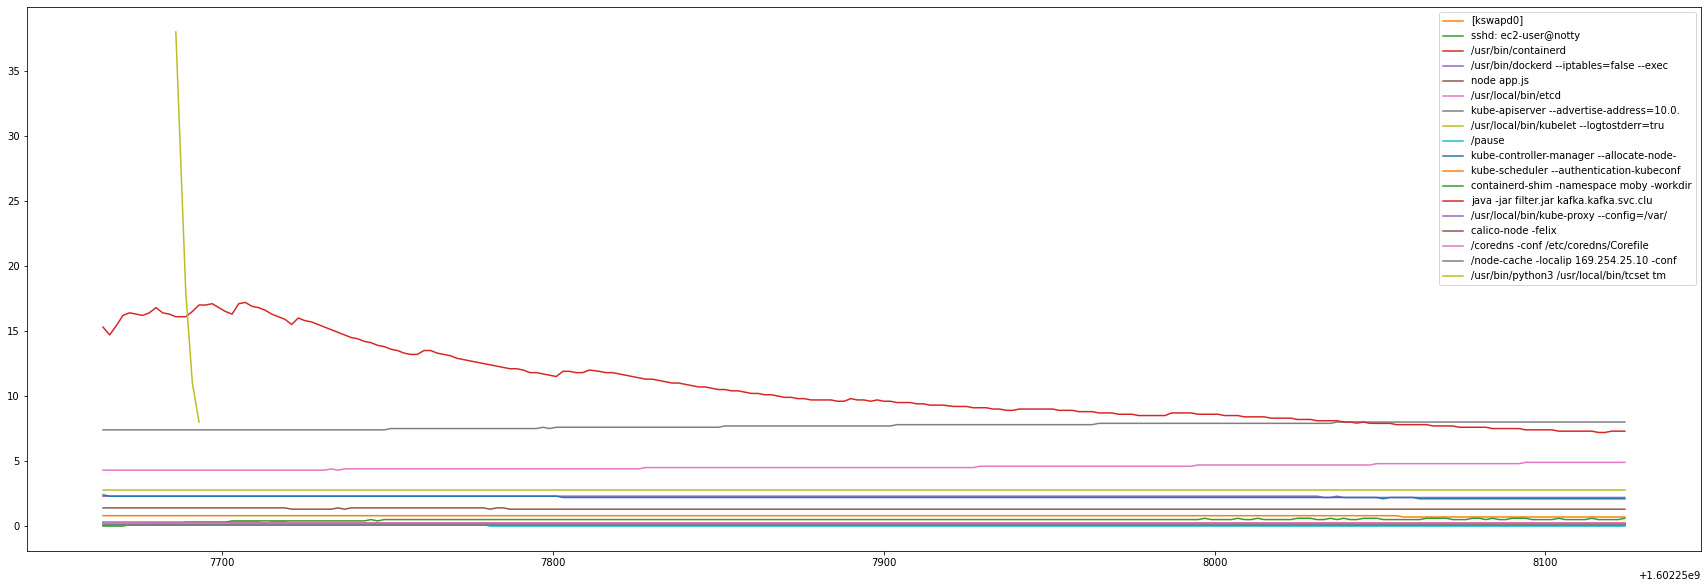

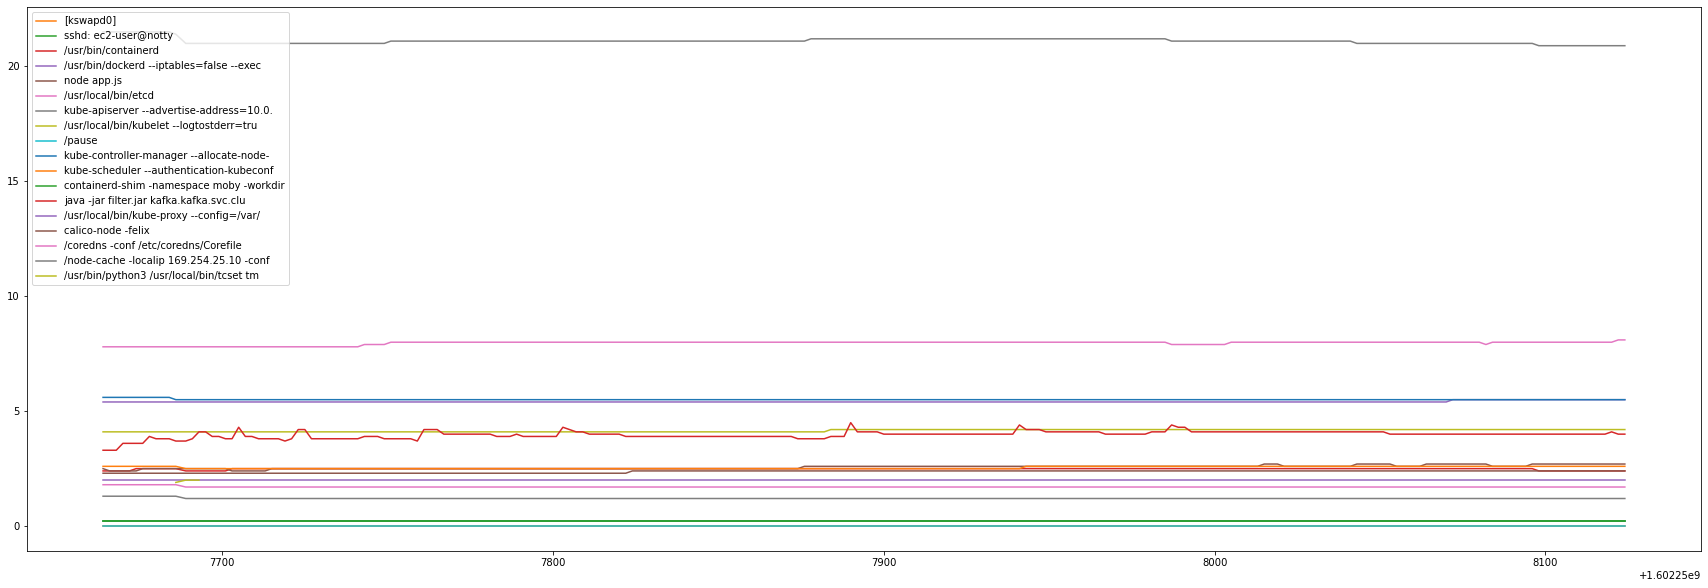

In [41]:
data = {}

date = None
for l in lines:
    if l.startswith("%CPU %MEM ARGS "):
        date = int(l[15:-1])
    elif l.startswith("%CPU %MEM"):
        pass
    else:
        e = l.split(' ');
        e = list(filter(lambda x: x != "", e))
        #print(e)
        cpu = float(e[0])
        mem = float(e[1])
        pid = int(e[2])
        time = e[3].split(":")
        secondsRunning = int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])
        task = " ".join(e[4:])[:-1]
        pid_data = data.get(pid, {
            "mem": [],
            "cpu": [],
            "pid" : pid,
            "running" : [],
            "name" : task
        })
        
        pid_data["mem"].append(mem)
        pid_data["cpu"].append(cpu)
        pid_data["running"].append(date)
        
        data[pid] = pid_data

zero_cpu = []
for k in data:
    summ = sum(data[k]["cpu"])
    if summ == 0.0:
        zero_cpu.append(k)

for x in zero_cpu:
    del data[x]
    
#print(data)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

for k in data:
    cpu = data[k]["cpu"]
    running = data[k]["running"]
    plt.plot(running, cpu, label = data[k]["name"][:40])
plt.legend()    
plt.show()

for k in data:
    mem = data[k]["mem"]
    running = data[k]["running"]
    plt.plot(running, mem, label = data[k]["name"][:40])
plt.legend()    
plt.show()